In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('C:../../Dataset/new-york-city-taxi-fare-prediction/train.csv', nrows=50000)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


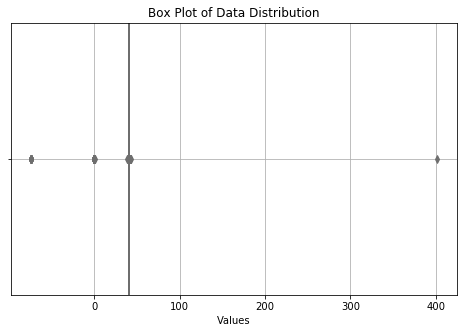

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['pickup_latitude'], color='lightcoral', width=10)
plt.title('Box Plot of Data Distribution')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [17]:
import numpy as np

def identify_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print('lower_bound:%f', lower_bound)
    print('upper_bound:%f', upper_bound)
    
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# IQR을 사용하여 이상치 식별
outliers_iqr = identify_outliers_iqr(data['pickup_latitude'])
#print("이상치 (IQR):", data[outliers_iqr])

lower_bound:%f 40.68615925
upper_bound:%f 40.816081249999996


In [18]:
# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

In [19]:
y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [22]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23466 entries, 37925 to 47506
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   23466 non-null  float64
 1   pickup_latitude    23466 non-null  float64
 2   dropoff_longitude  23466 non-null  float64
 3   dropoff_latitude   23466 non-null  float64
dtypes: float64(4)
memory usage: 916.6 KB


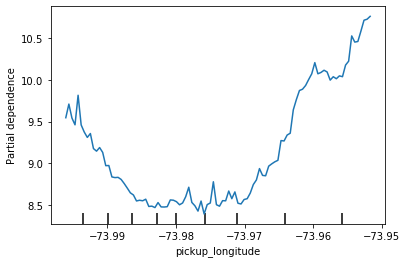

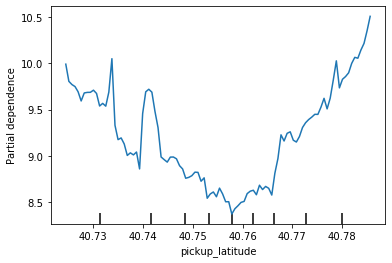

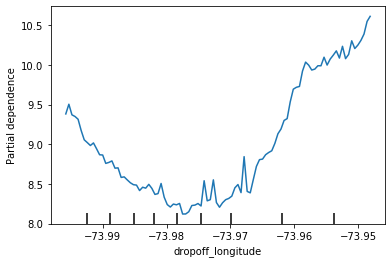

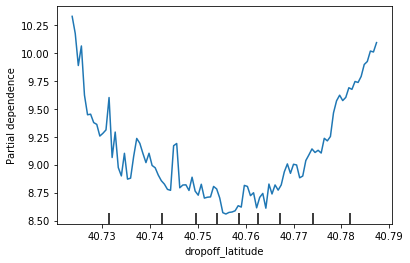

In [24]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

for feat_name in base_features:
    PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
    plt.show()

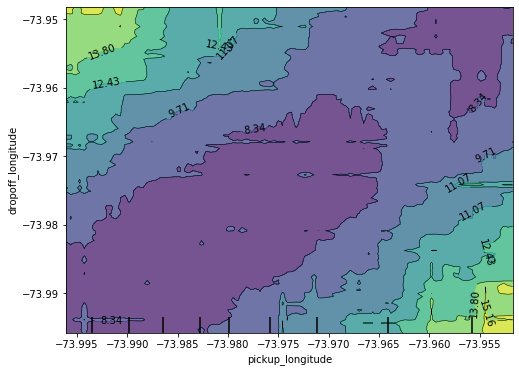

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('pickup_longitude', 'dropoff_longitude')]
PartialDependenceDisplay.from_estimator(first_model, val_X, f_names, ax=ax)
plt.show()

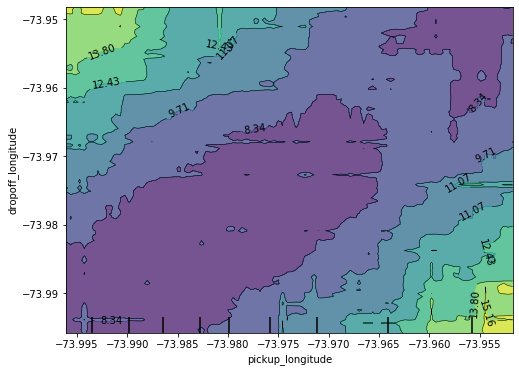

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
fnames_1 = [('pickup_longitude', 'dropoff_longitude')]
disp1 = PartialDependenceDisplay.from_estimator(first_model, val_X, fnames_1, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
fnames_2 = [('pickup_longitude_2', 'dropoff_longitude')]
disp1 = PartialDependenceDisplay.from_estimator(first_model, val_X, fnames_2, ax=ax)
plt.show()